# <center> Notatnik nr 9 - przetwarzanie danych w Pandas</center>

### Plan
* główne obiekty w Pandas
* czytanie danych z plików
* przetwarzanie danych
* wizualizacja danych

Pandas to 'rozszerzenie' z jednej strony numpy (wszystkie 'triki' z numpy tu działają), a z drugiej słowników (np. nie musi być unikalnych kluczy, istnieje kolejność).

In [1]:
import numpy as np
import pandas as pd

#styl standardowych wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')


## Pandas Series
Najprostszy obiekt pandas. Przypomina listę z indeksami (niekoniecznie liczbowymi, niekoniecznie unikalnymi)

In [196]:
lista=[2,4,0,1,2,0]
dane=pd.Series(data=lista,index=['a','b','c','d','e','e'],name='nasz pierwszy szereg')

a    2
b    4
c    0
d    1
e    2
e    0
Name: nasz pierwszy szereg, dtype: int64

e    2
e    0
Name: nasz pierwszy szereg, dtype: int64

### Najważniejsze metody i pola
* `Series.index` - indeks szeregu (to znowu jest pewien obiekt)
* `Series.values` - elementy szeregu
* `Seres.name` - nazwa szeregu (nie mylić z nazwą zmiennej, pod którą kryje się szereg)
* `Series.describe()` - podaje podstawowe statystyki
* `Series.unique()` - zwraca listę unikalych elementów
* `Series.value_counts()` - zlicza wystąpienia każdej z wartości
* `Series.sort_values()` - sortuje

In [38]:
dane.index
dane.values
dane.name
dane.describe()
dane.unique()
dane.value_counts()
dane.sort_values()

Index(['a', 'b', 'c', 'd', 'e', 'e'], dtype='object')

array([2, 4, 0, 1, 2, 0], dtype=int64)

'nasz pierwszy szereg'

count    6.000000
mean     1.500000
std      1.516575
min      0.000000
25%      0.250000
50%      1.500000
75%      2.000000
max      4.000000
Name: nasz pierwszy szereg, dtype: float64

array([2, 4, 0, 1], dtype=int64)

2    2
0    2
4    1
1    1
Name: nasz pierwszy szereg, dtype: int64

c    0
e    0
d    1
a    2
e    2
b    4
Name: nasz pierwszy szereg, dtype: int64

Dostęp do danej można otrzymać z konstrukcji `Series.'wybrany indeks'`, gdzie możemy używać napisów bez cudzysłowów (!!!) lub tradycyjnie jak do tablicy czy słownika `Series['wybrany indeks']`.

In [35]:
dane.e

e    2
e    0
Name: nasz pierwszy szereg, dtype: int64

In [36]:
dane['e']

e    2
e    0
Name: nasz pierwszy szereg, dtype: int64

Możemy obliczać wartości funkcji numpy na szeregach.

In [37]:
np.sin(dane)

a    0.909297
b   -0.756802
c    0.000000
d    0.841471
e    0.909297
e    0.000000
Name: nasz pierwszy szereg, dtype: float64

Szeregi naturalnie tworzą się ze słowników.

In [2]:
dane2_dict={'Ania':22,'Tomek':25,'Karol':23,'Marek':27, 'Kuba':22, 'Kasia':26, 'Mikołaj':23}
dane2=pd.Series(dane2_dict)
dane2

Ania       22
Tomek      25
Karol      23
Marek      27
Kuba       22
Kasia      26
Mikołaj    23
dtype: int64

Numpy'owe triki

In [3]:
dane2>25

Ania       False
Tomek      False
Karol      False
Marek       True
Kuba       False
Kasia       True
Mikołaj    False
dtype: bool

In [4]:
dane2[dane2>25]

Marek    27
Kasia    26
dtype: int64

### Szybkie rysowanie wykresów

## **DataFrame**

`DataFrame` to klasyczne tabele danych: mamy `index`, czyli nazwy wierszy oraz nazwy kolumn (`columns`)

In [84]:
daneDF=pd.DataFrame(lista)
daneDF

,0
0,2
1,4
2,0
3,1
4,2
5,0


In [91]:
df1 = pd.DataFrame([[909976, "Sweden"],
                           [8615246, "United Kingdom"],
                           [2872086, "Italy"],
                           [2273305, "France"]],
                          index=["Stockholm", "London", "Rome", "Paris"],
                          columns=["Population", "State"])

In [92]:
df1 = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                    "State": ["Sweden", "United Kingdom", "Italy","France"]},
                   index=["Stockholm", "London", "Rome", "Paris"])
df1

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


### Podstawowe komendy

* `.info()` - podaje podstawowe informacje o ramce danych
* `.head(n)` - $n$ rekordów od początku
* `.tail(n)` - $n$ rekordów od końca
* `.describe()` - jak w szeregu. **Uwaga**: pojedyncze statystyki są dostępne jako metody tak jak w `numpy`
* `.columns` - iterator po kolumnach
* `.index` - iterator po indeksie


Inne ważne operacje:

* `.isnull()` - szuka brakujących wartości
* `.duplicated()` oraz `df.drop_duplicates()` - znajduje lub usuwa zduplikowane wiersze/rekordy
* `.sort_values(by=[])` - sortuje według ustalonej kolumny/kolumn
* `.sort_index()` - sortuje indeks
* `.rename` - służy do zmiany nazw kolumn, indeksów
* `.drop` - usuwanie kolumn lub rekordów

In [93]:
dane=pd.read_csv('https://analityk.edu.pl/wp-content/uploads/2020/12/worldcities.csv')

In [94]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26569 entries, 0 to 26568
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        26569 non-null  object 
 1   city_ascii  26569 non-null  object 
 2   lat         26569 non-null  float64
 3   lng         26569 non-null  float64
 4   country     26569 non-null  object 
 5   iso2        26538 non-null  object 
 6   iso3        26569 non-null  object 
 7   admin_name  26493 non-null  object 
 8   capital     7626 non-null   object 
 9   population  25596 non-null  float64
 10  id          26569 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 2.2+ MB


### Przeglądanie DataFrame

#### Dostęp do kolumn - według nazw

In [95]:
dane.population;

In [96]:
dane['population'];

In [97]:
dane[['population','city']];

#### Dostęp do wierszy - według kolejności (!)

**Uwaga** - nie można wywołać tak konkretnego *pojedynczego* rekordu



In [98]:
dane[:5]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [99]:
dane[2:6]['city']

2       Delhi
3      Mumbai
4      Manila
5    Shanghai
Name: city, dtype: object

In [100]:
dane[0]; #błąd!!!!

KeyError: 0

Żeby wywołać pojedynczy rekord musimy użyć konstrukcji `DataFrame.iloc[]`. Zauważmy, że pojedynczy rekord to `pd.Series`

In [103]:
dane.iloc[0]['city']

'Tokyo'

### Przeglądanie po nazwach indeksu i modyfikacja danych

By przeglądać dane po nazwie indeksu używamy składni `DataFrame.loc[]`. Robiąc tak możemy też modyfikować dane.

**Uwaga:** 

* indeksy nie muszą być wartościami liczbowymi - może nim być dowolne pd.Series (np. któraś z kolumn). 
* indeksy powinny być unikalne, ale pandas tego nie wymusza

Do ustawienia nowego indeksu służy nam metoda `set_index`

In [104]:
dane.id.is_unique

True

In [105]:
dane.set_index('id',inplace=True) #bez inplace to tylko podgląd z innym indeksem

In [106]:
dane[:5]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population
id,,,,,,,,,,
1392685764,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0
1360771077,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0
1356872604,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0
1356226629,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0
1608618140,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0


In [77]:
dane.loc[1360771077,'capital']='admin' # podobnie możemy odwołać się do wielu wierszy jednocześnie i je modyfikować

In [ ]:
dane.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population
id,,,,,,,,,,
1392685764,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0
1360771077,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,admin,34540000.0
1356872604,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0
1356226629,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0
1608618140,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0


### Maski logiczne

Tak jak w numpy (zamiast `and` używamy `&` zamiast `or` używamy `|`)

In [109]:
dane[(dane.capital=='admin') | (dane.country=='Brazil')]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population
id,,,,,,,,,,
1356872604,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0
1356226629,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0
1156073548,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22120000.0
1076532519,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22046000.0
1156237133,Guangzhou,Guangzhou,23.1288,113.2590,China,CN,CHN,Guangdong,admin,20902000.0
...,...,...,...,...,...,...,...,...,...,...
1076303219,Pratânia,Pratania,-22.8083,-48.6661,Brazil,BR,BRA,São Paulo,NaN,5021.0
1076493823,Vila Bela da Santíssima Trindade,Vila Bela da Santissima Trindade,-15.0000,-59.9500,Brazil,BR,BRA,Mato Grosso,NaN,1612.0
1076482734,Príncipe da Beira,Principe da Beira,-12.4167,-64.4166,Brazil,BR,BRA,Rondônia,NaN,956.0


### Zadanie 1
* Znajdź wszystkie miasta w Polsce, które mają liczbę ludności mniejszą niż 10 tyś.

* Tym miasto z Polski, które nie mają danych w kolumnie capital wpisz 'brak'.

* Dodaj do całego zbioru danych nową kolumnę 'małe miasto', które zawiera True dla miast poniżej 10 tyś mieszkańców  i False w pozostałych przypadkach.

* Posortuj dane alfabetycznie po nazwie kraju (na stałe, a nie tylko jako widok)

In [ ]:
dane.apply

### Apply
Tworzenie nowych wartości, które powstają przez jakąś funkcję na istniejących danych odbywa się metodą `.apply()`. Można ją stosować na `pd.Series` (np. jednej kolumnie) lub na całym `pd.DataFrame`, ale wtey trzeba pilnować osi.

In [110]:

def kategoryzuj_populacje(ludnosc):
    if ludnosc>10**6: 
        return 'ogromne miasto'
    elif ludnosc>2 *10**5: 
        return 'srednie miasto'
    else: 
        return 'male miasto'
dane['Wielkosc']=dane.population.apply(kategoryzuj_populacje) #operacja na całej kolumnie

In [111]:
dane

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,Wielkosc
id,,,,,,,,,,,
1392685764,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,ogromne miasto
1360771077,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,ogromne miasto
1356872604,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,ogromne miasto
1356226629,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,ogromne miasto
1608618140,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,ogromne miasto
...,...,...,...,...,...,...,...,...,...,...,...
1304217709,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,male miasto
1304206491,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,male miasto
1804043438,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,male miasto


In [114]:
# operacje na wierszu
def polozenie(wiersz):
    wiersz['polozenie']=f'szerokość: {wiersz.lat}, długość: {wiersz.lng}'
    return wiersz
dane2=dane.apply(polozenie,axis=1);

### Grupowanie groupby
Metoda `.groupby()` zbiera wiersze posiadające tę samą wartość w ustalonej kolumnie (lub kolumnach). Połączone dane musi jakoś 'przetworzyć', więc podajemy jaką statystykę chcemy policzyć z całej 'paczki'.

In [123]:
dane.groupby('country').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_1360\3292212674.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dane.groupby('country').mean()


,lat,lng,population
country,,,
Afghanistan,34.755439,67.488482,191654.487179
Albania,41.137240,19.950260,33835.380000
Algeria,33.199642,3.345492,189968.666667
American Samoa,-14.274000,-170.704600,12576.000000
Andorra,42.522429,1.534929,22151.000000
...,...,...,...
Wallis And Futuna,-14.293300,-178.158300,NaN
West Bank,31.776400,35.226900,NaN
Yemen,14.599500,45.557967,171140.153846


In [126]:
y=dane.groupby(['country','admin_name']).count()
y

city  city_ascii  lat  lng  iso2  iso3  \
country     admin_name                                                   
Afghanistan Badakhshān             1           1    1    1     1     1   
            Baghlān                2           2    2    2     2     2   
            Balkh                  3           3    3    3     3     3   
            Bādghīs                1           1    1    1     1     1   
            Bāmyān                 1           1    1    1     1     1   
...                              ...         ...  ...  ...   ...   ...   
Zimbabwe    Mashonaland West       4           4    4    4     4     4   
            Masvingo               3           3    3    3     3     3   
            Matabeleland North     3           3    3    3     3     3   
            Matabeleland South     3           3    3    3     3     3   
            Midlands               3           3    3    3     3     3   

                                capital  population  Wielkosc  
country     admin_name                                         
Afghanistan Badakhshān                1           1         1  
            Baghlān                   2           2         2  
            Balkh                     3           3         3  
            Bādghīs                   1           1         1  
            Bāmyān                    1           1         1  
...                                 ...         ...       ...  
Zimbabwe    Mashonaland West          1           4         4  
            Masvingo                  1           3         3  
            Matabeleland North        1           2         3  
            Matabeleland South        1           3         3  
            Midlands                  1           3         3  

[4085 rows x 9 columns]

In [130]:
y.sort_index(ascending=False).head(20)

city  city_ascii  lat  lng  iso2  iso3  capital  \
country  admin_name                                                             
Zimbabwe Midlands                3           3    3    3     3     3        1   
         Matabeleland South      3           3    3    3     3     3        1   
         Matabeleland North      3           3    3    3     3     3        1   
         Masvingo                3           3    3    3     3     3        1   
         Mashonaland West        4           4    4    4     4     4        1   
         Mashonaland East        3           3    3    3     3     3        1   
         Mashonaland Central     3           3    3    3     3     3        1   
         Manicaland              1           1    1    1     1     1        1   
         Harare                  2           2    2    2     2     2        1   
         Bulawayo                1           1    1    1     1     1        1   
Zambia   Western                 6           6    6    6     6     6        1   
         Southern                3           3    3    3     3     3        1   
         Northern                2           2    2    2     2     2        1   
         North-Western           4           4    4    4     4     4        1   
         Muchinga                2           2    2    2     2     2        1   
         Lusaka                  2           2    2    2     2     2        1   
         Luapula                 4           4    4    4     4     4        1   
         Eastern                 3           3    3    3     3     3        1   
         Copperbelt              6           6    6    6     6     6        1   
         Central                 3           3    3    3     3     3        1   

                              population  Wielkosc  
country  admin_name                                 
Zimbabwe Midlands                      3         3  
         Matabeleland South            3         3  
         Matabeleland North            2         3  
         Masvingo                      3         3  
         Mashonaland West              4         4  
         Mashonaland East              3         3  
         Mashonaland Central           3         3  
         Manicaland                    1         1  
         Harare                        2         2  
         Bulawayo                      1         1  
Zambia   Western                       6         6  
         Southern                      3         3  
         Northern                      2         2  
         North-Western                 4         4  
         Muchinga                      2         2  
         Lusaka                        2         2  
         Luapula                       4         4  
         Eastern                       3         3  
         Copperbelt                    6         6  
         Central                       3         3

Pogrupowane dane mają nowy index (może być dwuwymiarowy). Z pogrupowanych danych możemy zrobić **tabelę przestawną** za pomocą metody `.unstack()`

### Agregacja agg
Agreguje wszystkie dane obliczając wartość określonej funkcji na kolumnie. Argumentem jest słownik postaci `nazwa_kolumny:[lista_funkcji]`

In [133]:
dane.agg({'population':['min','max','sum'],'lat':['min','max']})

,population,lat
min,0.000000e+00,-54.9341
max,3.797700e+07,81.7166
sum,4.155401e+09,NaN


### Zadanie 2
Wczytaj dane z pliku `zad9.2_miasta_Europy.csv`
* zorientuj się co znajduje się w tych danych, jakie są typy danych
* zmień (na stałe, nie jako podgląd!) nazwę kolumn, żeby nie zawierały polskich liter
* usuń niepotrzebe spacje z nazw państw (podpowiedź: metoda `String.strip`)
* stwórz kolumnę z numerycznymi wartościami populacji (podpowiedź: usuwanie przecinków: `String.replace()`)
* ustaw jako indeks kolumnę `Miasto`
* usuń kolumnę `Pozycja'
* *wyświetl* dane posortowane malejąco według nazwy państwa
* wskaż ile w tych danych jest miast z poszczególnych państw
* utwórz nową ramkę danych zawierającą liczbę mieszkańców poszczególnych państw (z posiadanych danych)
* zaprezentuj uzyskane przed chwilą dane na wykresie sortując uprzednio dane

### Zapisywanie wyników do pliku

* `DataFrame.to_excel()`
* `DataFrame.to_csv()`
* `DataFrame.to_json()`

* `DataFrame.to_clipboard()` - kopiuje do schowka

W argumentarch określamy zachowanie indeksu, nagłówków itp. itd.

In [181]:
df_kraje.sort_values(["Populacja"]).to_excel('sortowane_miasta.xlsx',header=False,index=False)

# Zadanie domowe

* (1p)  Wczytaj plik https://raw.githubusercontent.com/dshahid380/Data-analysis-with-pandas/master/datasets/weather.csv

* (1p) określ ile jest rekordów (wierszy) w DataFrame
* (3p) określ w których kolumnach występują brakujące wartości; uzupełnij je rozsądnie (np. zależnie od typu)
* (2p) usuń kolumny: temperatura odczuwalna (apparent temperature), kierunek wiatru (wind bearing) i dzienne podsumowanie (daily summary)
* (3p) stwórz kolumnę `data`, gdzie będzie sama data w formacie `yyyy-mm-dd`, a następnie kolumny `rok` i `miesiac` zawierające *liczby* określające rok i miesiąc danego rekordu

* (4p) oblicz *średnie* dzienne wszystich liczbowych danych, umieść je w nowej ramce danych oraz zapisz je do pliku .xlsx
* (4p) narysuj na jednym wykresie maksymalne i minimalne temperatury dzienne w maju 2010
* (4p) narysuj wykres słupkowy liczby dni ze średnią wilgotnością poniżej 60% w poszczególnych latach. Opisz go odpowiednio, żeby mógł służyć jako samodzielna prezentacja danych.

**Do zdobycia 22 punkty.**




# Łączenie danych

* ```concat``` - standardowa konkatenacja. Pytanie: jak uporządkować dane tzn. co z indeksem?
* ```merge```
* ```join```

In [275]:
dane2=pd.read_csv('https://analityk.edu.pl/wp-content/uploads/2020/12/worldcities.csv')
daneJapan=dane2[dane2.country=='Japan'][:5]
danePolska=dane2[dane2.country=='Poland'][:5]
dane_country=dane2[['country','iso3']][:5]
dane_ludnosc=dane2[['city','country','population']][:5]

#### Dokładanie nowych rekordów

In [232]:
pd.concat([daneJapan,danePolska]) #dane miały unikalne indeksy

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
21,Ōsaka,Osaka,34.6936,135.5019,Japan,JP,JPN,Ōsaka,admin,14977000.0,1392419823
44,Nagoya,Nagoya,35.1167,136.9333,Japan,JP,JPN,Aichi,admin,9113000.0,1392407472
209,Yokohama,Yokohama,35.4333,139.6333,Japan,JP,JPN,Kanagawa,admin,3748781.0,1392118339
364,Fukuoka,Fukuoka,33.5903,130.4019,Japan,JP,JPN,Fukuoka,admin,2128000.0,1392576294
422,Warsaw,Warsaw,52.2167,21.0333,Poland,PL,POL,Mazowieckie,primary,1790658.0,1616024847
984,Kraków,Krakow,50.0614,19.9372,Poland,PL,POL,Małopolskie,admin,766739.0,1616172264
1064,Łódź,Lodz,51.7769,19.4547,Poland,PL,POL,Łódzkie,admin,690422.0,1616832750
1138,Wrocław,Wroclaw,51.1077,17.0353,Poland,PL,POL,Dolnośląskie,admin,638586.0,1616108520
1287,Poznań,Poznan,52.4000,16.9167,Poland,PL,POL,Wielkopolskie,admin,538633.0,1616725607


In [240]:
# indeksy danych się pokrywają, bo tworzymy je na nowo
Japan_ri=daneJapan.reset_index()
Poland_ri=danePolska.reset_index()
pd.concat([Japan_ri,Poland_ri])

,index,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,21,Ōsaka,Osaka,34.6936,135.5019,Japan,JP,JPN,Ōsaka,admin,14977000.0,1392419823
2,44,Nagoya,Nagoya,35.1167,136.9333,Japan,JP,JPN,Aichi,admin,9113000.0,1392407472
3,209,Yokohama,Yokohama,35.4333,139.6333,Japan,JP,JPN,Kanagawa,admin,3748781.0,1392118339
4,364,Fukuoka,Fukuoka,33.5903,130.4019,Japan,JP,JPN,Fukuoka,admin,2128000.0,1392576294
0,422,Warsaw,Warsaw,52.2167,21.0333,Poland,PL,POL,Mazowieckie,primary,1790658.0,1616024847
1,984,Kraków,Krakow,50.0614,19.9372,Poland,PL,POL,Małopolskie,admin,766739.0,1616172264
2,1064,Łódź,Lodz,51.7769,19.4547,Poland,PL,POL,Łódzkie,admin,690422.0,1616832750
3,1138,Wrocław,Wroclaw,51.1077,17.0353,Poland,PL,POL,Dolnośląskie,admin,638586.0,1616108520
4,1287,Poznań,Poznan,52.4000,16.9167,Poland,PL,POL,Wielkopolskie,admin,538633.0,1616725607


Kiedy dołożymy opcjonalne ```ignore_index=True``` indeks zostanie nadany od nowa.

In [241]:
pd.concat([Japan_ri,Poland_ri],ignore_index=True)

,index,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,21,Ōsaka,Osaka,34.6936,135.5019,Japan,JP,JPN,Ōsaka,admin,14977000.0,1392419823
2,44,Nagoya,Nagoya,35.1167,136.9333,Japan,JP,JPN,Aichi,admin,9113000.0,1392407472
3,209,Yokohama,Yokohama,35.4333,139.6333,Japan,JP,JPN,Kanagawa,admin,3748781.0,1392118339
4,364,Fukuoka,Fukuoka,33.5903,130.4019,Japan,JP,JPN,Fukuoka,admin,2128000.0,1392576294
5,422,Warsaw,Warsaw,52.2167,21.0333,Poland,PL,POL,Mazowieckie,primary,1790658.0,1616024847
6,984,Kraków,Krakow,50.0614,19.9372,Poland,PL,POL,Małopolskie,admin,766739.0,1616172264
7,1064,Łódź,Lodz,51.7769,19.4547,Poland,PL,POL,Łódzkie,admin,690422.0,1616832750
8,1138,Wrocław,Wroclaw,51.1077,17.0353,Poland,PL,POL,Dolnośląskie,admin,638586.0,1616108520
9,1287,Poznań,Poznan,52.4000,16.9167,Poland,PL,POL,Wielkopolskie,admin,538633.0,1616725607


Kategoryzowanie łączonych danych o pokrywających się indeksach możemy dokonać wprowadzając `MultiIndex`.




In [244]:
df=pd.concat([Japan_ri,Poland_ri],keys=['Japonia','Polska'])

In [245]:
df.index

MultiIndex([('Japonia', 0),
            ('Japonia', 1),
            ('Japonia', 2),
            ('Japonia', 3),
            ('Japonia', 4),
            ( 'Polska', 0),
            ( 'Polska', 1),
            ( 'Polska', 2),
            ( 'Polska', 3),
            ( 'Polska', 4)],
           )

#### Dołącznie nowych kolumn tych samych danych
**Sposób prosty, ale naiwny**: korzystamy z funkcji `concat`, ale z dodanym argumentem `axis=1`. Dane łączą się według indeksów

In [249]:
dane_country.head()

,country,iso3
0,Japan,JPN
1,Indonesia,IDN
2,India,IND
3,India,IND
4,Philippines,PHL


In [254]:
dane_ludnosc.head()

,city,country,population
0,Tokyo,Japan,37977000.0
1,Jakarta,Indonesia,34540000.0
2,Delhi,India,29617000.0
3,Mumbai,India,23355000.0
4,Manila,Philippines,23088000.0


In [256]:
pd.concat([dane_country,dane_ludnosc],axis=1) #kolumna country się powtarza

,country,iso3,city,country,population
0,Japan,JPN,Tokyo,Japan,37977000.0
1,Indonesia,IDN,Jakarta,Indonesia,34540000.0
2,India,IND,Delhi,India,29617000.0
3,India,IND,Mumbai,India,23355000.0
4,Philippines,PHL,Manila,Philippines,23088000.0


**Sposób 2**: użycie **metody** `join`, który łączy dane po indeksach lub po *wksazanej* kolumnie. Kolumny dublujące się oznaczy sufixem

In [277]:
dane_ludnosc.join(dane_country,lsuffix='-lud',rsuffix='-cou')

,city,country-lud,population,country-cou,iso3
0,Tokyo,Japan,37977000.0,Japan,JPN
1,Jakarta,Indonesia,34540000.0,Indonesia,IDN
2,Delhi,India,29617000.0,India,IND
3,Mumbai,India,23355000.0,India,IND
4,Manila,Philippines,23088000.0,Philippines,PHL


**Sposób 3:** wykorzystanie `merge`, które działa bazodanowo. Konieczne jest podanie z której ramki bierzemy klucze (domyślnie `inner`). Możemy ręcznie ustawić po jakich kombinacjach kolumn ma łączyć.

In [278]:
df3=pd.merge(dane_ludnosc, dane_country)

In [280]:
df3 # dane się dublują bo były duble w dane_country, a merge wyszukuje wszystkie relacje

,city,country,population,iso3
0,Tokyo,Japan,37977000.0,JPN
1,Jakarta,Indonesia,34540000.0,IDN
2,Delhi,India,29617000.0,IND
3,Delhi,India,29617000.0,IND
4,Mumbai,India,23355000.0,IND
5,Mumbai,India,23355000.0,IND
6,Manila,Philippines,23088000.0,PHL


In [272]:
dane_country.drop_duplicates(inplace=True)

In [273]:
df3=pd.merge(dane_ludnosc, dane_country, how='left')
df3

,city,country,population,iso3
0,Tokyo,Japan,37977000.0,JPN
1,Jakarta,Indonesia,34540000.0,IDN
2,Delhi,India,29617000.0,IND
3,Mumbai,India,23355000.0,IND
4,Manila,Philippines,23088000.0,PHL


### Zadanie 3
Przygotuj DataFrame z **wszystkimi** miastami z ramki `miasta` i skrótami dobranymi z ramki `skroty` (pozostałe `NaN`). Następnie przygoruj analogiczny DF, gdzie będą tylko miasta z krajów, których skróty znamy.




In [281]:
skroty=dane2[['country','iso3']][:10]
miasta=dane2[['city','country','population']]

### Zadanie 4
* Połącz trzy zbiory danych z plików [tutaj](https://github.com/jakevdp/data-USstates/)
* Zadbaj o brakujące dane. Usuń rekordy, których nie jesteś w stanie uzupełnić danymi (tam gdzie brakuje)
* stwórz tabelę przestawną opisującą ludność w poszczególnych stanach (bez sumarycznej wartości w całym USA) w roku 2010 w podziale na kategorie wiekowe
* zaprezentuje powyższe dane na wykresie
* zaprezentuj na wykresie gęstości zaludnienia w roku 2010 w poszczególnych stanach (j.w.) w kolejności malejącej

In [307]:
pop = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv')
areas = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv')
abbrevs = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv')

# Biblioteka Bokeh

Do tworzenia interaktywnych wykresów [więcej](https://bebi103a.github.io/lessons/06/intro_to_plotting_with_bokeh.html)

In [27]:
import bokeh.io
import bokeh.plotting

# Włączamy widok bokeh
bokeh.io.output_notebook()

Loading BokehJS ...

In [28]:
p = bokeh.plotting.figure(
    width=400,
    height=300)

In [39]:
#uwaga: `final` to dane wytworzone w zadaniu 4 po połączeniu plików. Każdy może mieć tam inną nazwę ramki danych

final=final #tu wstaw własną nazwę
data2010=final[(final.year==2010) & (final['state/region']!='USA') & (final.ages=='total')]

data2010.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 3 to 2490
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state/region   52 non-null     object 
 1   ages           52 non-null     object 
 2   year           52 non-null     int64  
 3   population     52 non-null     float64
 4   state          52 non-null     object 
 5   area (sq. mi)  52 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [40]:
p.circle(source=data2010, x='population', y='area (sq. mi)',color='blue')
bokeh.io.show(p)

In [41]:
# po najechaniu na kropkę widzimy 'podpowiedź'

p2 = bokeh.plotting.figure(
    width=400,
    height=300,
    tooltips=[('stan','@state')]
    )
p2.circle(source=data2010, x='population', y='area (sq. mi)',color='blue')
bokeh.io.show(p2)

# Wykresy w Seaborn

In [42]:
import seaborn as sns
sns.set()

In [43]:
dane2_dict={'Ania':22,'Tomek':25,'Karol':23,'Marek':27, 'Kuba':22, 'Kasia':26, 'Mikołaj':23}
dane2=pd.Series(dane2_dict)
dane2DF=pd.DataFrame(dane2)
dane2DF=dane2DF.reset_index().rename(columns={'index':'imie',0:'wiek'})
dane2DF

,imie,wiek
0,Ania,22
1,Tomek,25
2,Karol,23
3,Marek,27
4,Kuba,22
5,Kasia,26
6,Mikołaj,23


<Axes: xlabel='imie', ylabel='wiek'>

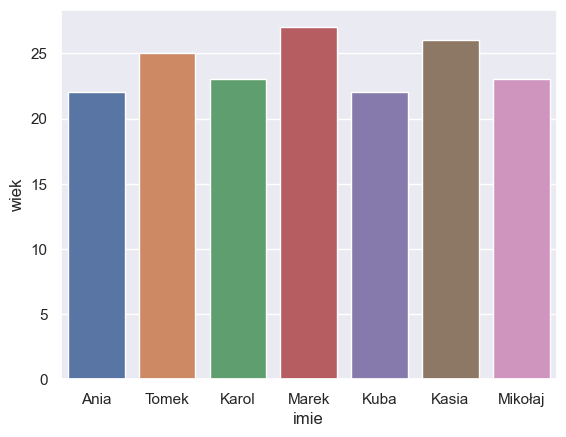

In [44]:
sns.barplot(data=dane2DF,x='imie',y='wiek')

Mamy dostępne wiele ciekawych wykresów statystycznych

In [45]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

<Axes: xlabel='x', ylabel='Density'>

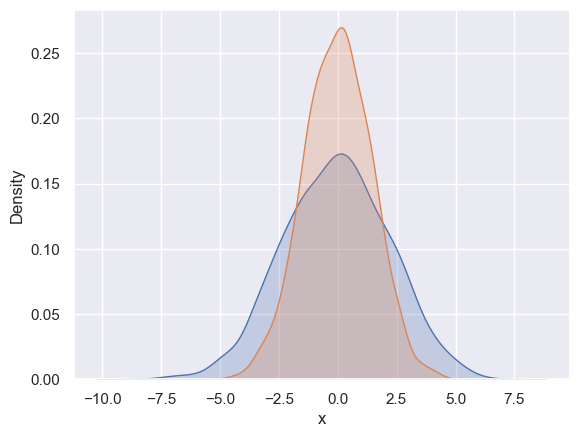

In [47]:
sns.kdeplot(data,x='x',fill=True)
sns.kdeplot(data,x='y',fill=True)

<Axes: ylabel='Count'>

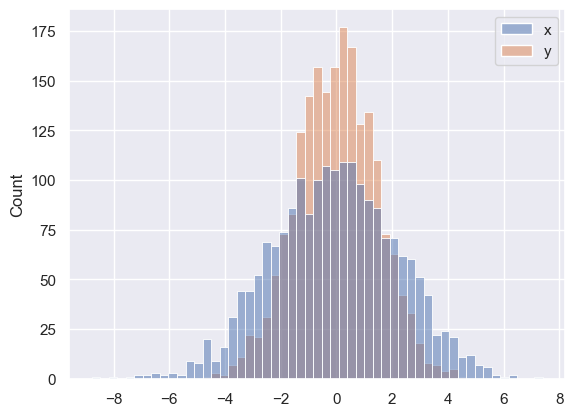

In [48]:
sns.histplot(data)

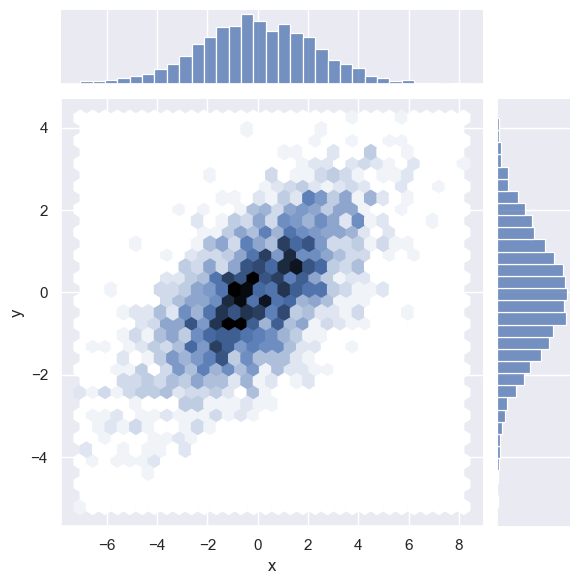

In [226]:
#piękny wykres rozrzutu
sns.jointplot(data=data,x='x',y='y', kind='hex');

In [236]:
#przykładowy zbior danych
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


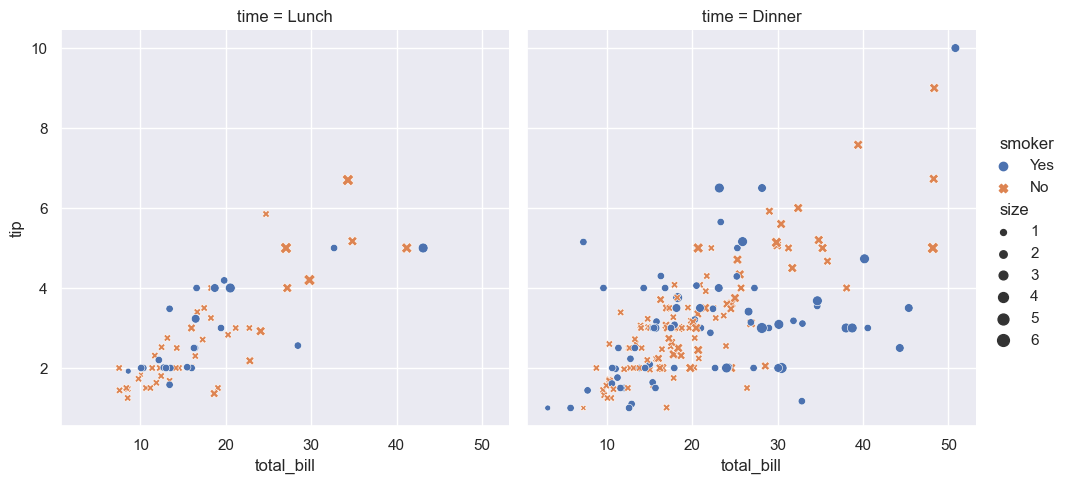

In [237]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

<a id='z5'></a>

### Zadanie 5
Załaduj dane `'titanic'` z zasobów przykładów seaborn. 
* znajdź dwie kolumny, które zawierają identyczne dane (być może w innym formacie) i usuń zbędne kolumny (przynajmniej jedną)
* stwórz wykres (seaborn), którym przeanalizujesz zależność przeżycia katastrofy od ceny biletu (fare)
* policz ile było kobiet i ilu mężczyzn z poszczególnych klas, którzy nie przeżyli

[rozwiązanie](#r5)

In [ ]:
titanic = sns.load_dataset("titanic")